In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.usetex'] = True

# General

In [23]:
# Test integral computation

t = 5 
integral = (t**2)/2

steps = int(1e7)

x = np.linspace(0, t, num=steps)
I = np.zeros(steps)
dt = t/steps
for i in range(steps-1):
    I[i+1] = I[i]+ (t- (i/steps)*t) * dt
I[-1], integral

(12.500001249999746, 12.5)

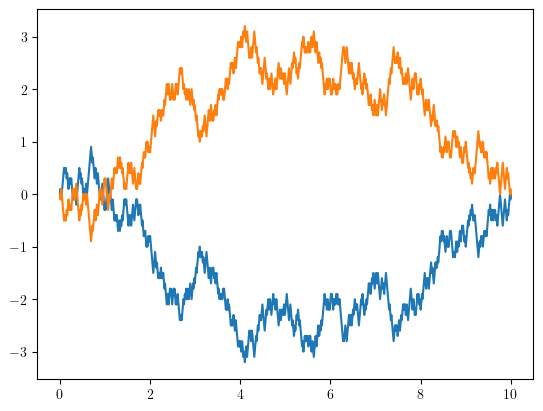

In [24]:
class BrownianMotion:

    W: np.ndarray
    time: np.ndarray

    def __init__(self, t: float, steps: int = 1000, paths: int = 1):
        Z = np.random.normal(0.0, 1.0, [paths, steps])
        W = np.zeros([paths, steps + 1])

        dt = t / steps
        for i in range(steps):
            if paths > 1:
                Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
            W[:, i + 1] = W[:, i] + np.power(dt, 0.5) * Z[:, i]

        self.W = W
        self.time = np.linspace(0, t, steps+1)

    def plot(self):

        plt.figure(1)
        plt.plot(self.time, np.transpose(self.W))


BrownianMotion(t=10, paths=2).plot()

# Exercise 1

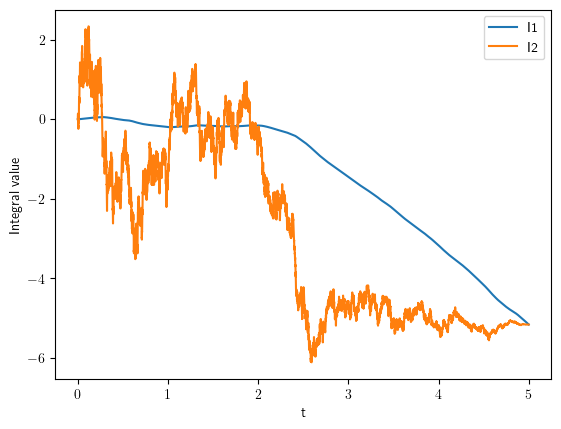

In [25]:
class BrownianMotionEx1:

    W: np.ndarray
    time: np.ndarray
    I1: np.ndarray
    I2: np.ndarray

    def __init__(self, t: float, steps: int = 1000, paths: int = 1):
        Z = np.random.normal(0.0, 1.0, [paths, steps])
        W = np.zeros([paths, steps + 1])
        
        I1= np.zeros([paths, steps + 1])
        I2= np.zeros([paths, steps + 1])

        dt = t / steps
        for i in range(steps):
            if paths > 1:
                Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
            W[:, i + 1] = W[:, i] + np.power(dt, 0.5) * Z[:, i]
            I2[:, i+1] = I2[:, i] + t*(1- i/steps)*(W[:,i+1]-W[:,i]) 
            I1[:, i+1] = I1[:, i] + W[:,i]* dt
            
        self.W = W
        self.I1 = I1
        self.I2 = I2
        self.time = np.linspace(0, t, steps+1)

    def plot(self):

        plt.figure(1)
        # plt.plot(self.time, np.transpose(self.W), label='path')
        plt.plot(self.time, self.I1.squeeze(), label='I1')
        plt.plot(self.time, self.I2.squeeze(), label='I2')
        plt.xlabel('t')
        plt.ylabel('Integral value')
        plt.legend()

# TODO: compare only the last value of the graph
BrownianMotionEx1(t=5, paths=1, steps=int(1e4)).plot()

# Exercise 3

Text(0, 0.5, '$\\frac{1}{2}X(t) - \\frac{1}{2}Y(t)$')

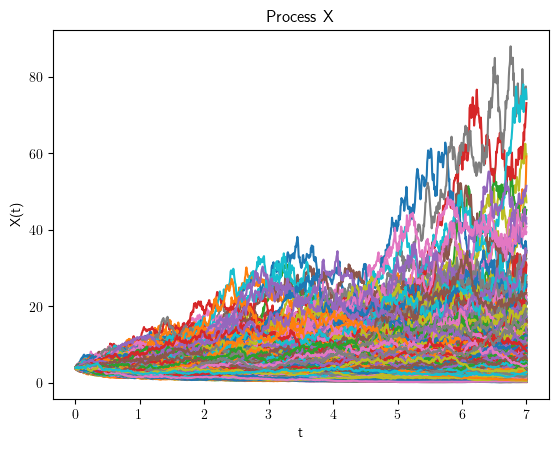

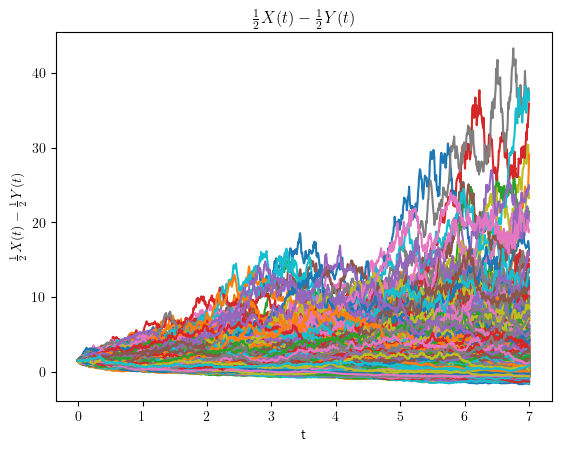

In [26]:
class GeometricBrownianMotion:

    W: np.ndarray
    time: np.ndarray

    def __init__(self, t: float, steps: int = 1000, paths: int = 1, beta:float=1, sigma:float=1, x_0:float=0, r:float=1):
        Z = np.random.normal(0.0, 1.0, [paths, steps])
        X = np.zeros([paths, steps + 1])
        X[:,0] = x_0

        dt = t / steps
        for i in range(steps):
            if paths > 1:
                Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
            
            X[:, i + 1] =  X[:, i] + (r * X[:, i]) * dt + sigma * X[:,i]  * np.power(dt, 0.5) * Z[:, i]


        self.X = X
        self.time = np.linspace(0, t, steps+1)


r = 0.06
t = 7
paths = 1000
steps = 1000
X = GeometricBrownianMotion(t=t, paths=paths, steps=steps, beta=0.04, sigma=0.38, x_0=4.0, r=r)
Y = GeometricBrownianMotion(t=t, paths=paths, steps=steps, beta=0.1, sigma=0.15, x_0=1.0, r=r)
M = np.exp(X.time* r)
plt.figure()
plt.plot(X.time, X.X.T);
plt.title('Process X')
plt.xlabel('t')
plt.ylabel('X(t)')

process = 0.5 * X.X - 0.5 * Y.X
plt.figure()
plt.plot(X.time, process.T);
equation = r'$\frac{1}{2}X(t) - \frac{1}{2}Y(t)$'
plt.title(equation)
plt.xlabel('t')
plt.ylabel(equation)

Text(0, 0.5, 'V(7y, K)')

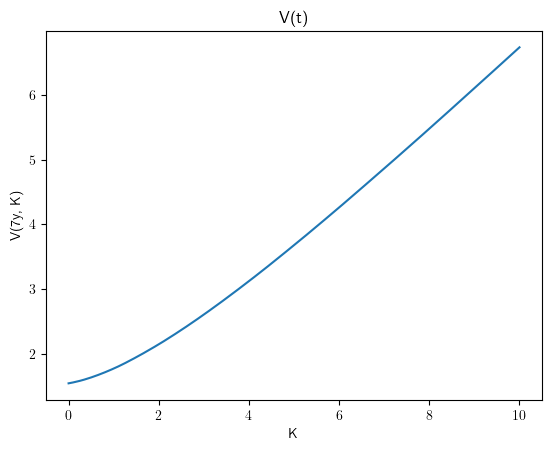

In [27]:


result_v = []
k_space = np.linspace(0, 10, num=200)
for k in k_space:
    K = np.zeros(steps+1).reshape(1, steps+1) + k
    v = 1/M * np.maximum(0.5*X.X-0.5*Y.X, K)
    result_v.append(np.average(v[:,-1]))

    
plt.figure(1)
plt.plot(np.linspace(0,10,num=200), result_v)
plt.title('V(t)')
plt.xlabel('K')
plt.ylabel('V(7y, K)')

# Exercise 4

Text(0, 0.5, 'X(t)')

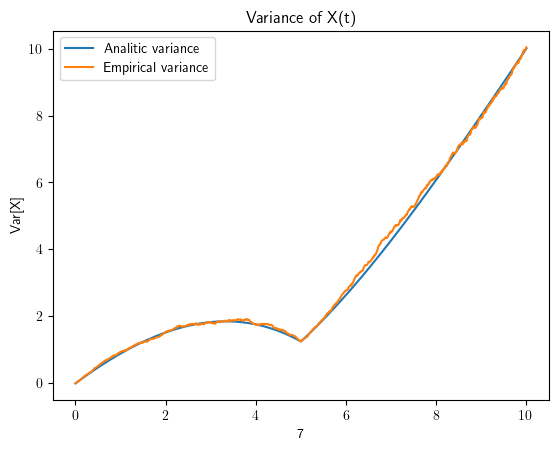

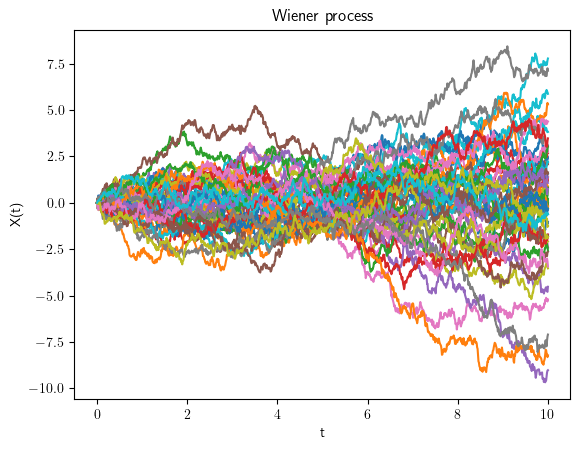

In [28]:
def analitic_variance(t:int=10, steps:int=1000):
    X = np.linspace(0,t, num=steps)
    var = X*(1+  (X/t**2)*(t-X) -2/t * np.minimum(X, t-X) )
    return (X, var)
    
    

class BrownianMotionEx5:

    W: np.ndarray
    time: np.ndarray
    var: np.ndarray
    analitic_variance: np.ndarray

    def __init__(self, t: float, steps: int = 1000, paths: int = 1):
        Z = np.random.normal(0.0, 1.0, [paths, steps])
        W = np.zeros([paths, steps + 1])

        dt = t / steps
        for i in range(steps):
            if paths > 1:
                Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
            W[:, i + 1] = W[:, i]+ np.power(dt, 0.5) * Z[:, i]

        self.W = W
        X = np.zeros([paths, steps+1])
        for i in range(steps+1):
            X[:,i]=W[:,i] - (i/(steps))*W[:,steps-i]
        
        self.X = X
        self.var = np.var(X, axis=0)
        self.time = np.linspace(0, t, steps+1)
        _, self.analitic_variance = analitic_variance(t, steps+1)


    def plot(self, paths:bool=True):

        plt.figure(1)
        if paths:
            plt.plot(self.time, np.transpose(self.W))
        plt.plot(self.time, self.analitic_variance, label='Analitic variance')
        plt.plot(self.time, self.var, label='Empirical variance')
        plt.xlabel(t)
        plt.ylabel('Var[X]')
        plt.title('Variance of X(t)')
        plt.legend()


BrownianMotionEx5(t=10, paths=1000).plot(paths=False)

bm = BrownianMotionEx5(t=10, paths=50)
plt.figure()
plt.plot(bm.time, bm.X.T)
plt.title('Wiener process')
plt.xlabel('t')
plt.ylabel('X(t)')